In [1]:
# !pip install xgboost==1.6.2

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.multioutput import MultiOutputRegressor



import matplotlib.pyplot as plt 
import seaborn  as sns

import inspect

from sklearn.model_selection import cross_val_score


In [5]:
data=pd.read_csv('Dataset.csv')
data.drop('Index',
  axis='columns',inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Area                 500 non-null    int64
 1   OE                   500 non-null    int64
 2   COb                  500 non-null    int64
 3   Area_left            500 non-null    int64
 4   considerble trees    500 non-null    int64
 5   considerable plants  500 non-null    int64
 6   Neem                 500 non-null    int64
 7   Ash                  500 non-null    int64
 8   Willow               500 non-null    int64
 9   Poplar               500 non-null    int64
 10  Ashok                500 non-null    int64
 11  Arjuna               500 non-null    int64
 12  Areca_palm           500 non-null    int64
 13  Weeping_fig          500 non-null    int64
 14  Grebera_Daisy        500 non-null    int64
 15  Aloe_vera            500 non-null    int64
 16  Tulsi                500 n

In [7]:
          
# data = pd.DataFrame(data)
X=data.iloc[:,0:4].values
Y=data[['considerble trees','considerable plants']]
print("X:",X.shape)
print("Y:",Y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, test_size=0.33, random_state=42)


X: (500, 4)
Y: (500, 2)


In [8]:
scaler=StandardScaler()
X_train_sacled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


Y_scaled_train=scaler.fit_transform(y_train)
Y_scaled_test=scaler.fit_transform(y_test)


In [9]:
def show_(X_test_scaled,y_test_predict,y_mse,y_r2_):
    plt.figure(figsize=(8,6))
    

    plt.scatter(y_test_predict[name],Y_scaled_test)
    plt.title(name)
    plt.xlabel("Actual")
    plt.ylabel("predicted")
    plt.show()
    print('RMSE for ',name,' is         :',y_mse[name])
    print('r2_score for ',name,' is     :',y_r2_[name])
    print("score",name, 'is             :',score[name])

In [10]:

ESTIMATORS = {
    "K-nn": KNeighborsRegressor(leaf_size=60,p=1,n_neighbors=29,n_jobs=1,weights='uniform',algorithm='brute'), 
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5)),

}

In [11]:
model=LinearRegression()
model.fit(X_train_sacled,y_train)

LinearRegression()

In [13]:
y_test_predict = dict()
y_mse = dict()
y_r2_=dict()
score=dict()

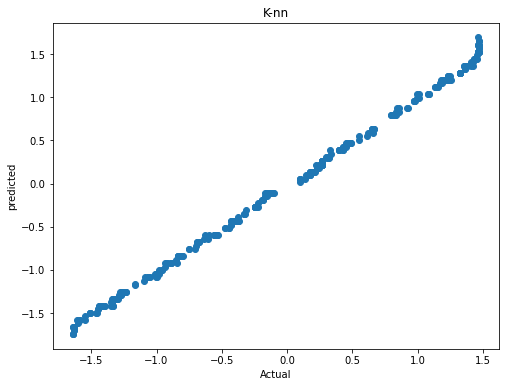

RMSE for  K-nn  is         : 0.0020769558198155957
r2_score for  K-nn  is     : 0.9979230441801844
score K-nn is             : 0.9979230441801844


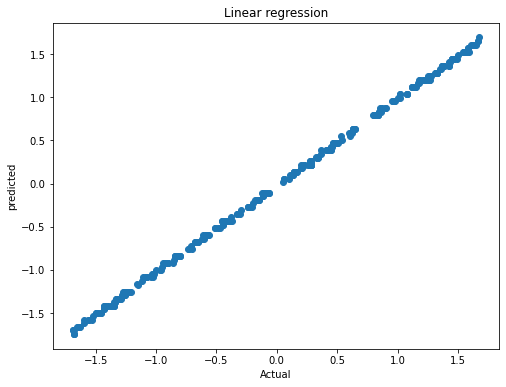

RMSE for  Linear regression  is         : 0.0008679388975576911
r2_score for  Linear regression  is     : 0.9991320611024423
score Linear regression is             : 0.9991320611024423


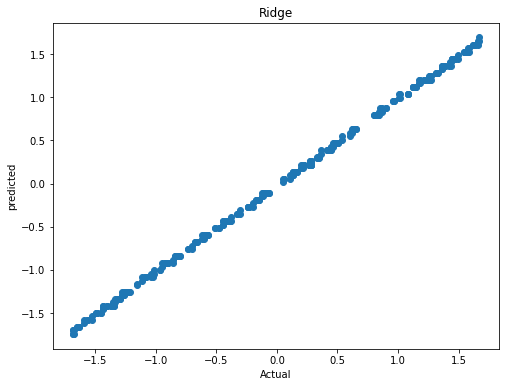

RMSE for  Ridge  is         : 0.0008833729422260148
r2_score for  Ridge  is     : 0.999116627057774
score Ridge is             : 0.999116627057774


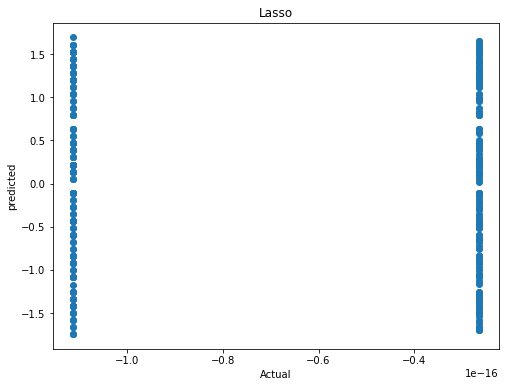

RMSE for  Lasso  is         : 1.0
r2_score for  Lasso  is     : -3.3306690738754696e-16
score Lasso is             : -3.3306690738754696e-16


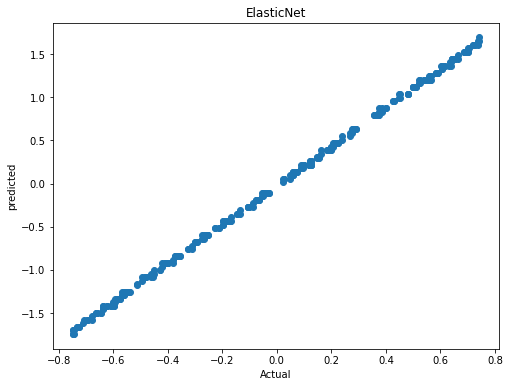

RMSE for  ElasticNet  is         : 0.3091724598384487
r2_score for  ElasticNet  is     : 0.6908275401615511
score ElasticNet is             : 0.6908275401615511


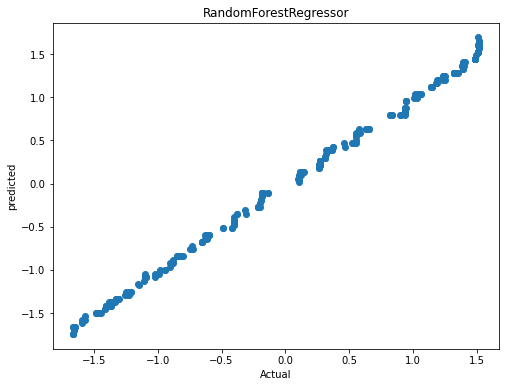

RMSE for  RandomForestRegressor  is         : 0.001977175791169506
r2_score for  RandomForestRegressor  is     : 0.9980228242088305
score RandomForestRegressor is             : 0.9980228242088305


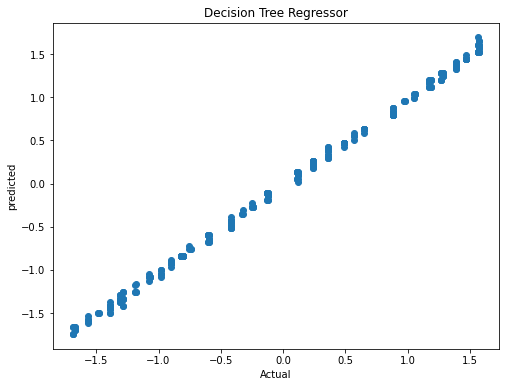

RMSE for  Decision Tree Regressor  is         : 0.0017147246284154767
r2_score for  Decision Tree Regressor  is     : 0.9982852753715845
score Decision Tree Regressor is             : 0.9982852753715845


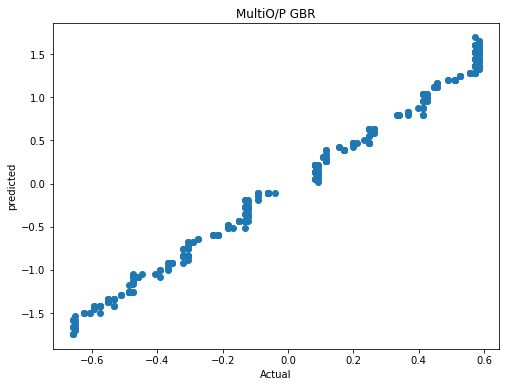

RMSE for  MultiO/P GBR  is         : 0.35959266235444476
r2_score for  MultiO/P GBR  is     : 0.6404073376455551
score MultiO/P GBR is             : 0.6404073376455551


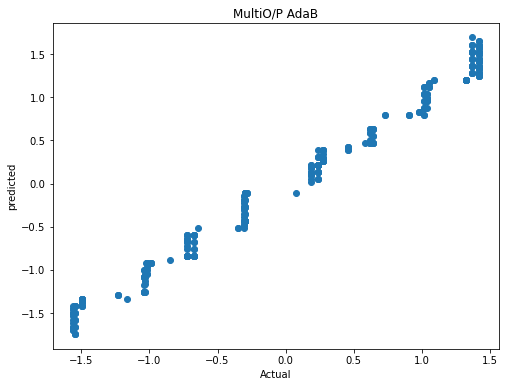

RMSE for  MultiO/P AdaB  is         : 0.013540694451758789
r2_score for  MultiO/P AdaB  is     : 0.9864593055482411
score MultiO/P AdaB is             : 0.9864593055482411


In [14]:
for name,estimator in ESTIMATORS.items():
    estimator.fit(X_train_sacled,Y_scaled_train)
    y_test_predict[name]= estimator.predict(X_test_scaled)    
    y_mse[name]=mean_squared_error(Y_scaled_test,estimator.predict(X_test_scaled))
    y_r2_[name]=r2_score(Y_scaled_test,estimator.predict(X_test_scaled))
    score[name]=estimator.score(X_test_scaled,Y_scaled_test)
    show_(X_test_scaled,y_test_predict,y_mse,y_r2_)


# HYPER PARAMETER TUNIG